In [1]:
import matplotlib.gridspec as gridspec
from statsmodels.tsa.api import adfuller
import matplotlib.pyplot as plt
from DTO.Database import *
from numpy import log
import seaborn as sns
import pandas as pd

In [2]:
db_manager = HLDatabase()

In [3]:
pollution = db_manager.get_table(table_name='Train-Pollution')
pollution.drop(columns=['index'], inplace=True)

In [ ]:
for column in pollution:
    print(adfuller(pollution[column])[1])

In [ ]:
# Set the seaborn style
sns.set_theme()

# Define colors for each subplot
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Create a 3x3 grid
gs = gridspec.GridSpec(3, 3)

fig = plt.figure(figsize=(60,30)) # Adjusted the figure size

# List of axes
axes = []

# Add the first 7 subplots as usual
for i in range(7):
    row = i // 3
    col = i % 3
    axes.append(fig.add_subplot(gs[row, col]))

# Add the last subplot, that spans two columns
axes.append(fig.add_subplot(gs[2, 1:]))

# Loop over each axis and column in dataframe
for ax, col_name, color in zip(axes, pollution.columns, colors):
    sns.lineplot(data=pollution[col_name], ax=ax, color=color, linewidth=1.5)
    ax.set_xticks(pollution.index[::800])
    ax.set_xticklabels(pollution.index[::800], rotation=45)
    ax.set_title(col_name, fontsize=16)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Pollution Level', fontsize=12)
    ax.grid(True)

# Handle special case for the last subplot:
axes[-1].plot(pollution, label=pollution.columns)
axes[-1].legend(pollution.columns)
axes[-1].set_title('Pollution Levels', fontsize=16)

plt.tight_layout()
plt.savefig('Pol.png')# This will reduce the margins and make the figure more compact
plt.show()

In [4]:
log_pol = log(pollution)

In [ ]:
for column in log_pol:
    print(adfuller(log_pol[column])[1])

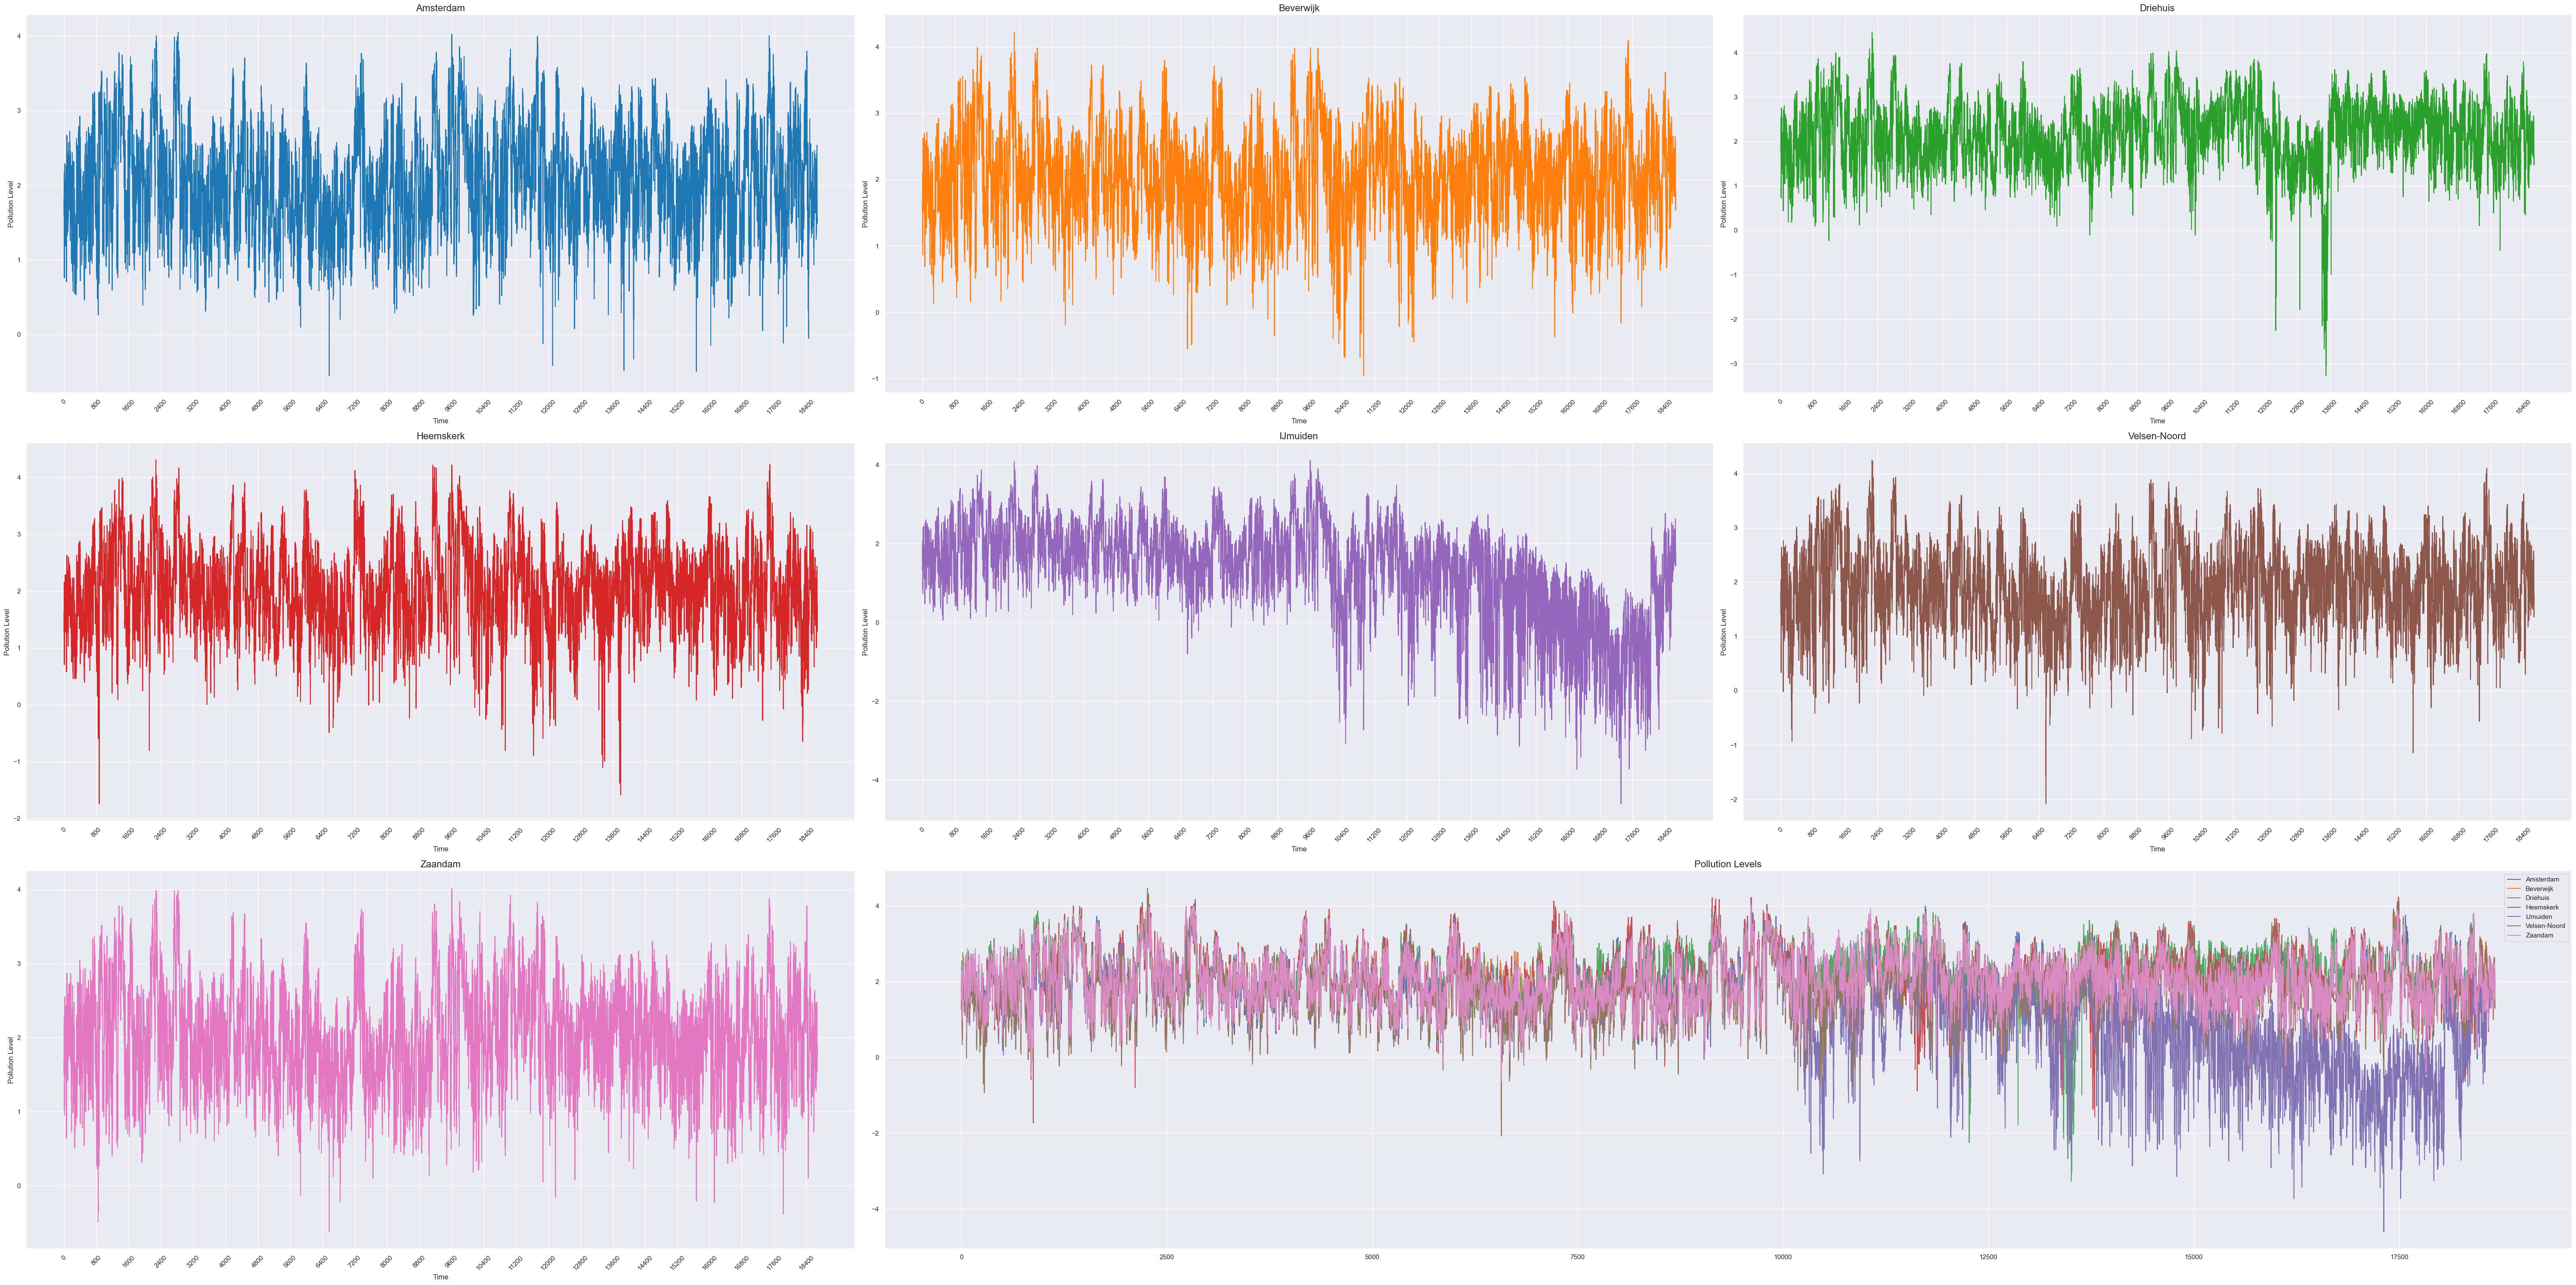

In [5]:
# Set the seaborn style
sns.set_theme()

# Define colors for each subplot
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Create a 3x3 grid
gs = gridspec.GridSpec(3, 3)

fig = plt.figure(figsize=(60,30)) # Adjusted the figure size

# List of axes
axes = []

# Add the first 7 subplots as usual
for i in range(7):
    row = i // 3
    col = i % 3
    axes.append(fig.add_subplot(gs[row, col]))

# Add the last subplot, that spans two columns
axes.append(fig.add_subplot(gs[2, 1:]))

# Loop over each axis and column in dataframe
for ax, col_name, color in zip(axes, log_pol.columns, colors):
    sns.lineplot(data=log_pol[col_name], ax=ax, color=color, linewidth=1.5)
    ax.set_xticks(log_pol.index[::800])
    ax.set_xticklabels(log_pol.index[::800], rotation=45)
    ax.set_title(col_name, fontsize=16)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Pollution Level', fontsize=12)
    ax.grid(True)

# Handle special case for the last subplot:
axes[-1].plot(log_pol, label=log_pol.columns)
axes[-1].legend(log_pol.columns)
axes[-1].set_title('Pollution Levels', fontsize=16)

plt.tight_layout()
plt.savefig('LogPol.png')# This will reduce the margins and make the figure more compact
plt.show()

In [ ]:
windspeed = db_manager.get_table(table_name='TestWind Speed')
windspeed.set_index('Date', inplace=True, drop=True)
winddir = db_manager.get_table(table_name='TestWind Direction')
winddir.set_index('Date', inplace=True, drop=True)

In [ ]:
# Create a new dataframe with the first columns of df1 and df2
amsterdam = pd.DataFrame()
amsterdam['Wind Speed'] = windspeed["Amsterdam"].iloc[:]
amsterdam['Wind Direction'] = winddir["Amsterdam"].iloc[:]
amsterdam

In [ ]:
# Set the seaborn style
sns.set_theme()

# Create a 2x1 grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(40,20)) # Adjust the figure size

sns.lineplot(data=amsterdam["Wind Speed"].iloc[7000:9000], ax=ax1, color='tab:blue', linewidth=1.5)
ax1.set_xticks(amsterdam.index[7000:9000:100])
ax1.set_xticklabels(amsterdam.index[7000:9000:100], rotation=45)
ax1.set_title("Wind Speed", fontsize=16)
ax1.set_xlabel('')
ax1.set_ylabel('Speed (units)', fontsize=12)
ax1.grid(True)

sns.lineplot(data=amsterdam["Wind Direction"].iloc[7000:9000], ax=ax2, color='tab:orange', linewidth=1.5)
ax2.set_xticks(amsterdam.index[7000:9000:100])
ax2.set_xticklabels(amsterdam.index[7000:9000:100], rotation=45)
ax2.set_title("Wind Direction", fontsize=16)
ax2.set_xlabel('Time', fontsize=12)
ax2.set_ylabel('Direction (degrees)', fontsize=12)
ax2.grid(True)

plt.tight_layout() # This will reduce the margins and make the figure more compact
plt.savefig('/Users/main/Desktop/Wind.png')
plt.show()